# loan

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc, f1_score

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0


In [3]:
df.info() # 결측치는 존재하지 않음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43386 entries, 0 to 43385
Data columns (total 23 columns):
AGE              43386 non-null int64
TOT_LOAN         43386 non-null int64
TOT_LOAN_CRD     43386 non-null int64
LOAN_BNK         43386 non-null int64
LOAN_CPT         43386 non-null int64
CRDT_CNT         43386 non-null int64
GUARN_CNT        43386 non-null int64
INCOME           43386 non-null int64
LOAN_CRD_CNT     43386 non-null int64
LATE_RATE        43386 non-null int64
LATE_RATE_1Y     43386 non-null int64
INS_MON_MAX      43386 non-null float64
CANCEL_CNT_1Y    43386 non-null int64
CALL_TIME        43386 non-null float64
TEL_COST_MON     43386 non-null int64
MOBILE_PRICE     43386 non-null int64
SUSP_DAY         43386 non-null int64
LATE_TEL         43386 non-null int64
COMB_COMM        43386 non-null int64
SEX              43386 non-null object
PAY_METHOD       43386 non-null object
JOB              43386 non-null object
TARGET           43386 non-null int64
dtypes: fl

In [4]:
df["COMB_COMM"]=df["COMB_COMM"].astype('object')
df["TARGET"]=df["TARGET"].astype('object')
df.dtypes

AGE                int64
TOT_LOAN           int64
TOT_LOAN_CRD       int64
LOAN_BNK           int64
LOAN_CPT           int64
CRDT_CNT           int64
GUARN_CNT          int64
INCOME             int64
LOAN_CRD_CNT       int64
LATE_RATE          int64
LATE_RATE_1Y       int64
INS_MON_MAX      float64
CANCEL_CNT_1Y      int64
CALL_TIME        float64
TEL_COST_MON       int64
MOBILE_PRICE       int64
SUSP_DAY           int64
LATE_TEL           int64
COMB_COMM         object
SEX               object
PAY_METHOD        object
JOB               object
TARGET            object
dtype: object

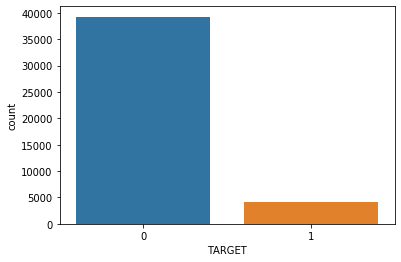

In [5]:
sns.countplot(df["TARGET"])
plt.show()

In [6]:
df.describe(include="number")

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL
count,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000
mean,46.250980,82.019407,32.829622,49.324897,4.288641,3.004264,0.098695,2778.629051,0.163855,8.216406,6.389619,373.254506,0.024662,2.098970,75.477804,534.423547,18.433320,13.757664
std,9.693741,126.702976,83.419760,92.443944,12.660968,1.842478,0.529664,2470.097227,0.617522,12.120840,14.556618,690.067030,0.206476,15.364253,62.311464,382.237230,133.523351,53.272289
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.430000,40.000000,0.000000,0.000000,0.000000
50%,45.000000,36.000000,9.000000,9.000000,0.000000,3.000000,0.000000,3600.000000,0.000000,3.000000,0.000000,190.000000,0.000000,0.990000,60.000000,700.000000,0.000000,0.000000
75%,55.000000,102.000000,27.000000,60.000000,3.000000,4.000000,0.000000,4700.000000,0.000000,11.000000,10.000000,390.000000,0.000000,1.887500,80.000000,900.000000,0.000000,0.000000
max,70.000000,994.000000,994.000000,944.000000,301.000000,11.000000,10.000000,10000.000000,11.000000,100.000000,100.000000,10000.000000,6.000000,1520.000000,950.000000,1200.000000,2700.000000,1200.000000


In [7]:
df.describe(include="object")

,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
count,43386,43386,43386,43386,43386
unique,2,2,4,4,2
top,0,F,C,B,0
freq,24944,23712,25139,20532,39254


In [8]:
df.corr()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL
AGE,1.000000,0.100693,0.049429,0.057704,-0.023392,0.049496,0.058666,-0.081809,0.075785,0.013287,-0.064284,0.026295,-0.032861,-0.019069,-0.237655,-0.109713,-0.036550,-0.120485
TOT_LOAN,0.100693,1.000000,0.632357,0.701314,0.116705,0.170974,0.134531,0.012968,-0.004628,-0.007837,-0.029522,-0.001429,-0.013515,-0.003979,-0.025535,0.007084,-0.005584,-0.073642
TOT_LOAN_CRD,0.049429,0.632357,1.000000,0.270881,0.146111,0.085600,0.116401,0.002396,-0.009705,-0.005303,-0.010542,0.001316,-0.005225,0.001596,-0.002275,-0.004659,0.003761,-0.032863
LOAN_BNK,0.057704,0.701314,0.270881,1.000000,-0.009503,0.193755,0.074777,0.017675,-0.011940,-0.014524,-0.026955,-0.010057,-0.010740,-0.003940,-0.029786,0.025103,-0.000574,-0.086872
LOAN_CPT,-0.023392,0.116705,0.146111,-0.009503,1.000000,0.114739,0.054870,0.004443,0.005227,-0.000476,0.000123,-0.003147,0.002629,-0.002090,0.046424,0.024000,0.017395,0.025093
CRDT_CNT,0.049496,0.170974,0.085600,0.193755,0.114739,1.000000,0.043878,0.030422,0.014215,-0.012764,-0.045928,-0.010673,-0.022755,-0.018273,-0.043181,0.035898,-0.010408,-0.117635
GUARN_CNT,0.058666,0.134531,0.116401,0.074777,0.054870,0.043878,1.000000,-0.003874,0.001083,-0.003697,-0.000719,0.000044,0.003245,-0.007010,0.021785,0.003654,0.004719,-0.001234
INCOME,-0.081809,0.012968,0.002396,0.017675,0.004443,0.030422,-0.003874,1.000000,-0.019576,-0.031606,-0.013500,0.101702,0.011573,0.009676,0.014201,0.022284,-0.002880,-0.003106
LOAN_CRD_CNT,0.075785,-0.004628,-0.009705,-0.011940,0.005227,0.014215,0.001083,-0.019576,1.000000,0.090242,0.049966,0.093993,0.015307,0.002786,-0.018169,0.000028,0.007401,-0.000121
LATE_RATE,0.013287,-0.007837,-0.005303,-0.014524,-0.000476,-0.012764,-0.003697,-0.031606,0.090242,1.000000,0.501203,0.058652,0.107632,-0.007324,0.000998,-0.014796,-0.000435,0.019700


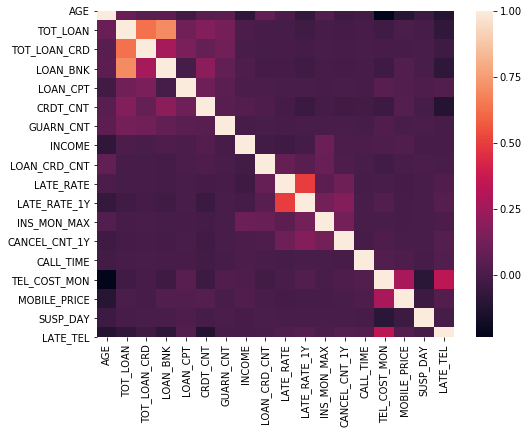

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.show()

In [10]:
# for _ in range(0, 18):
#     sns.distplot(df.iloc[:,_])
#     plt.savefig(str(_)+".png", dpi=300)
#     plt.show()

In [11]:
# for _ in range(0, 18):
#     sns.boxplot(df["TARGET"], df.iloc[:,_])
#     plt.savefig(str(_)+".png", dpi=300)
#     plt.show()

## logistic regression

In [12]:
formula=[]
for _ in df.columns:
    formula.append(_)
formula.remove("TARGET")
formula="+".join(formula)
formula

'AGE+TOT_LOAN+TOT_LOAN_CRD+LOAN_BNK+LOAN_CPT+CRDT_CNT+GUARN_CNT+INCOME+LOAN_CRD_CNT+LATE_RATE+LATE_RATE_1Y+INS_MON_MAX+CANCEL_CNT_1Y+CALL_TIME+TEL_COST_MON+MOBILE_PRICE+SUSP_DAY+LATE_TEL+COMB_COMM+SEX+PAY_METHOD+JOB'

In [13]:
df["TARGET"]=df["TARGET"].astype('float')
result=sm.Logit.from_formula("TARGET~"+str(formula),df).fit()

Optimization terminated successfully.
         Current function value: 0.230292
         Iterations 8


In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                43386
Model:                          Logit   Df Residuals:                    43359
Method:                           MLE   Df Model:                           26
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                  0.2677
Time:                        21:57:10   Log-Likelihood:                -9991.5
converged:                       True   LL-Null:                       -13645.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3995      0.142      2.822      0.005       0.122       0.677
COMB_COMM[T.1]     -0.1461      0.040     -3.614      0.000      -0.225      -0.067
SEX[T.M]            0.0128      0.038      0.333      0.739      -0.063       0.088
PAY_METHOD[T.B]    -1.9719      0.070    -28.326      0.000      -2.108      -1.835
PAY_METHOD[T.C]    -1.6482      0.057    -28.848      0.000      -1.760      -1.536
PAY_METHOD[T.D]    -0.8375      0.077    -10.890      0.000      -0.988      -0.687
JOB[T.B]            0.1817      0.078      2.344      0.019       0.030       0.334
JOB[T.C]            0.0908      0.077      1.186      0.236      -0.059       0.241
JOB[T.D]            0.0601      0.096      0.626      0.531      -0.128       0.248
AGE                -0.0020      0.002     -1.009      0.313      -0.006       0.002
TOT_LOAN           -0.0019      0.000     -4.870      0.000      -0.003      -0.001
TOT_LOAN_CRD        0.0009      0.000      1.984      0.047    1.15e-05       0.002
LOAN_BNK           -0.0087      0.001    -13.165      0.000      -0.010      -0.007
LOAN_CPT            0.0178      0.001     14.365      0.000       0.015       0.020
CRDT_CNT           -0.4832      0.013    -36.229      0.000      -0.509      -0.457
GUARN_CNT           0.2416      0.033      7.387      0.000       0.178       0.306
INCOME           3.659e-05   8.62e-06      4.242      0.000    1.97e-05    5.35e-05
LOAN_CRD_CNT       -0.0452      0.031     -1.453      0.146      -0.106       0.016
LATE_RATE           0.0009      0.002      0.504      0.615      -0.002       0.004
LATE_RATE_1Y        0.0204      0.001     16.723      0.000       0.018       0.023
INS_MON_MAX      1.362e-05   2.61e-05      0.521      0.602   -3.76e-05    6.48e-05
CANCEL_CNT_1Y       0.4176      0.067      6.225      0.000       0.286       0.549
CALL_TIME           0.0012      0.001      1.533      0.125      -0.000       0.003
TEL_COST_MON       -0.0003      0.000     -1.145      0.252      -0.001       0.000
MOBILE_PRICE       -0.0005   4.99e-05    -10.642      0.000      -0.001      -0.000
SUSP_DAY            0.0004      0.000      3.280      0.001       0.000       0.001
LATE_TEL            0.0042      0.000     13.505      0.000       0.004       0.005
===================================================================================
"""

In [15]:
np.exp(result.params)

Intercept          1.491020
COMB_COMM[T.1]     0.864084
SEX[T.M]           1.012885
PAY_METHOD[T.B]    0.139198
PAY_METHOD[T.C]    0.192397
PAY_METHOD[T.D]    0.432804
JOB[T.B]           1.199285
JOB[T.C]           1.095099
JOB[T.D]           1.061928
AGE                0.998014
TOT_LOAN           0.998080
TOT_LOAN_CRD       1.000938
LOAN_BNK           0.991387
LOAN_CPT           1.017954
CRDT_CNT           0.616803
GUARN_CNT          1.273318
INCOME             1.000037
LOAN_CRD_CNT       0.955838
LATE_RATE          1.000859
LATE_RATE_1Y       1.020611
INS_MON_MAX        1.000014
CANCEL_CNT_1Y      1.518326
CALL_TIME          1.001163
TEL_COST_MON       0.999652
MOBILE_PRICE       0.999469
SUSP_DAY           1.000372
LATE_TEL           1.004217
dtype: float64

## Modeling

In [16]:
X=df.drop(["TARGET"], axis=1)
y=df["TARGET"]

In [17]:
X=pd.get_dummies(X, drop_first=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1011)

In [19]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9114167178856791

In [20]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     11783
         1.0       0.59      0.21      0.31      1233

    accuracy                           0.91     13016
   macro avg       0.76      0.60      0.63     13016
weighted avg       0.89      0.91      0.89     13016



In [21]:
f1_score(y_test, logreg.predict(X_test))

0.30583985550872966

In [22]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1011)

In [24]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.912338660110633

In [25]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     11783
         1.0       0.60      0.23      0.33      1233

    accuracy                           0.91     13016
   macro avg       0.76      0.61      0.64     13016
weighted avg       0.89      0.91      0.89     13016



In [26]:
f1_score(y_test, logreg.predict(X_test))

0.3300058719906048

## cross validation

In [27]:
# skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=1011)
# score=cross_val_score(logreg, X, y, cv=skf)
# score.mean()

In [28]:
# y_scores=cross_val_predict(logreg, X, y, cv=skf, method="decision_function")
# y_scores.shape

In [29]:
# y_scores

## ROC curve

In [30]:
y_scores=logreg.predict_proba(X_test)[:,1]

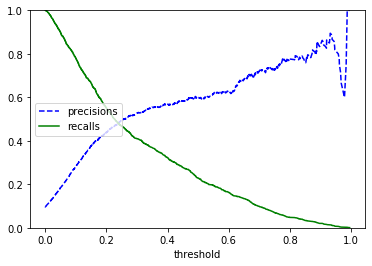

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precisions")
    plt.plot(thresholds, recalls[:-1], "g-", label="recalls")
    plt.xlabel("threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

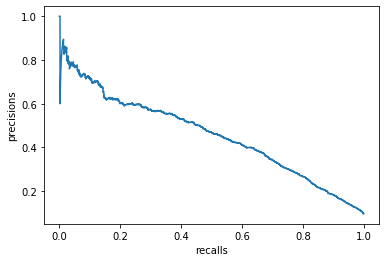

In [32]:
plt.plot(recalls, precisions)
plt.xlabel("recalls")
plt.ylabel("precisions")
plt.show()

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
roc_auc

0.8589675738735594

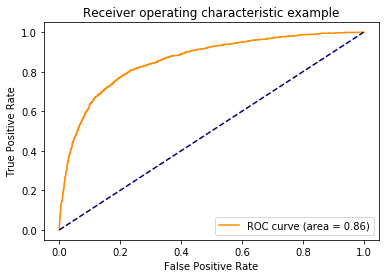

In [34]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cutoff = np.arange(0,1,0.01)
acc=[]
f1=[]
for cut in cutoff:
    predicted = [1 if i>cut else 0 for i in y_scores]
    cfm = confusion_matrix(y_test, predicted)
    acc.append(accuracy_score(y_test, predicted))
    f1.append(f1_score(y_test, predicted))

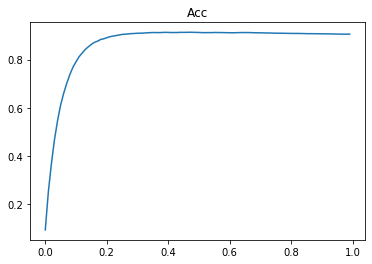

In [36]:
plt.plot(cutoff, acc)
plt.title('Acc')
plt.show()

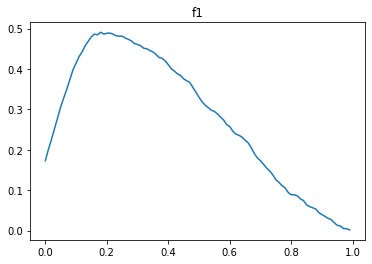

In [37]:
plt.plot(cutoff, f1)
plt.title('f1')
plt.show()